In [1]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.3 MB/s eta 0:00:00


In [2]:
!git clone "https://github.com/Atharva-Malode/ML-Bootcamp.git"

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 450, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 450 (delta 60), reused 41 (delta 23), pack-reused 325
Receiving objects: 100% (450/450), 9.74 MiB | 16.99 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
!cp "/content/ML-Bootcamp/Week-2/Day-1/plots_week2.py" "/content/"

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()
from mpl_toolkits.mplot3d import Axes3D
import copy
from matplotlib import animation
from plots_week2 import plot_3d_graph, cost_vs_iteration

In [6]:
np.random.seed(42)

m = 100
study_hours = np.random.randint(1, 8, size=m)
math_score = np.random.randint(40, 100, size=m)
science_score = np.random.randint(50, 100, size=m)
english_score = np.random.randint(30, 90, size=m)
attendance_percentage = np.random.randint(70, 100, size=m)

y = np.random.randint(1, 6, size=m)

feature_explanations = {
    'study_hours': study_hours,
    'math_score': math_score,
    'science_score': science_score,
    'english_score': english_score,
    'attendance_percentage': attendance_percentage,
    "Student Rank": y,
}

dataset = pd.DataFrame(feature_explanations)

alpha = 9e-7
num_iters = 100
X = dataset.drop("Student Rank", axis=1)
Y = dataset['Student Rank']

n_features = X.shape[1]
w_initial = np.zeros((n_features,))
b_initial = 0.0

In [7]:
dataset

,study_hours,math_score,science_score,english_score,attendance_percentage,Student Rank
0,7,47,81,57,74,4
1,4,53,56,86,97,2
2,5,62,71,54,98,3
3,7,99,77,79,85,4
4,3,96,51,52,88,5
...,...,...,...,...,...,...
95,6,54,88,59,91,1
96,4,82,67,62,95,2
97,6,68,89,57,95,3
98,7,75,50,76,91,4


In [8]:
dataset.describe()

,study_hours,math_score,science_score,english_score,attendance_percentage,Student Rank
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.210000,68.830000,73.230000,61.020000,85.780000,3.220000
std,1.913773,16.954517,14.731163,16.570011,9.069407,1.439557
min,1.000000,40.000000,50.000000,30.000000,70.000000,1.000000
25%,2.750000,54.000000,60.000000,49.000000,78.000000,2.000000
50%,4.000000,68.500000,75.000000,62.000000,87.000000,3.500000
75%,6.000000,81.250000,86.000000,77.000000,94.000000,4.250000
max,7.000000,99.000000,98.000000,89.000000,99.000000,5.000000


In [9]:
X

,study_hours,math_score,science_score,english_score,attendance_percentage
0,7,47,81,57,74
1,4,53,56,86,97
2,5,62,71,54,98
3,7,99,77,79,85
4,3,96,51,52,88
...,...,...,...,...,...
95,6,54,88,59,91
96,4,82,67,62,95
97,6,68,89,57,95
98,7,75,50,76,91


In [10]:
Y

0     4
1     2
2     3
3     4
4     5
     ..
95    1
96    2
97    3
98    4
99    5
Name: Student Rank, Length: 100, dtype: int64

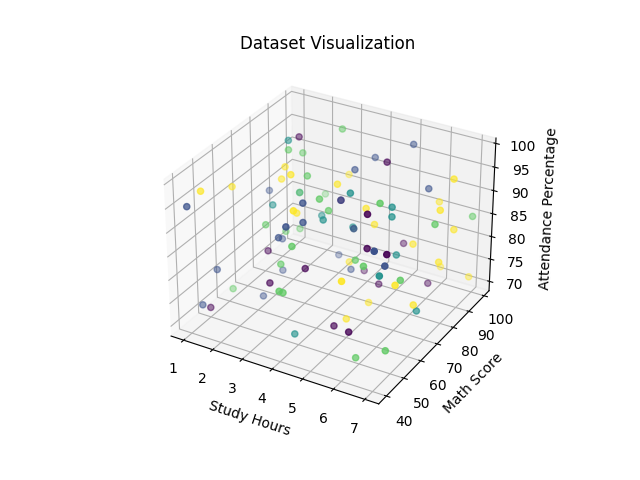

In [11]:
plot_3d_graph(X.values, Y.values)

In [12]:
def compute_error(x, y, w, b):

    multiplication = np.dot(x, w)
    add_bias = multiplication + b
    subtract_actual_value = add_bias - y
    error = (np.dot(x, w) + b) - y
    return error

In [13]:
def compute_cost(X, y, w, b):

    m = len(y)
    total_cost = 0.0

    for i in range(m):
        x_i = X[i]
        y_i = y[i]

        error = compute_error(x_i, y_i, w, b)
        squared_error = error ** 2
        total_cost += squared_error
    cost = total_cost / (2 * m)
    return cost

In [14]:
def compute_gradient(X, y, w, b):

    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        error = compute_error(X[i], y[i], w, b)          #Hint: use the computer_error function implemented above

        for j in range(n):
            dj_dw[j] += error * X[i, j]
        dj_db += error

    dj_dw /= m
    dj_db /= m

    return dj_db, dj_dw


In [23]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100:
            J_history.append( cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

In [24]:
w_final, b_final, J_history = gradient_descent(X.values, Y.values, w_initial, b_initial, compute_cost, compute_gradient, alpha, num_iters)

Iteration    0: Cost     6.01   
Iteration   10: Cost     4.41   
Iteration   20: Cost     3.32   
Iteration   30: Cost     2.58   
Iteration   40: Cost     2.08   
Iteration   50: Cost     1.74   
Iteration   60: Cost     1.51   
Iteration   70: Cost     1.36   
Iteration   80: Cost     1.25   
Iteration   90: Cost     1.18   


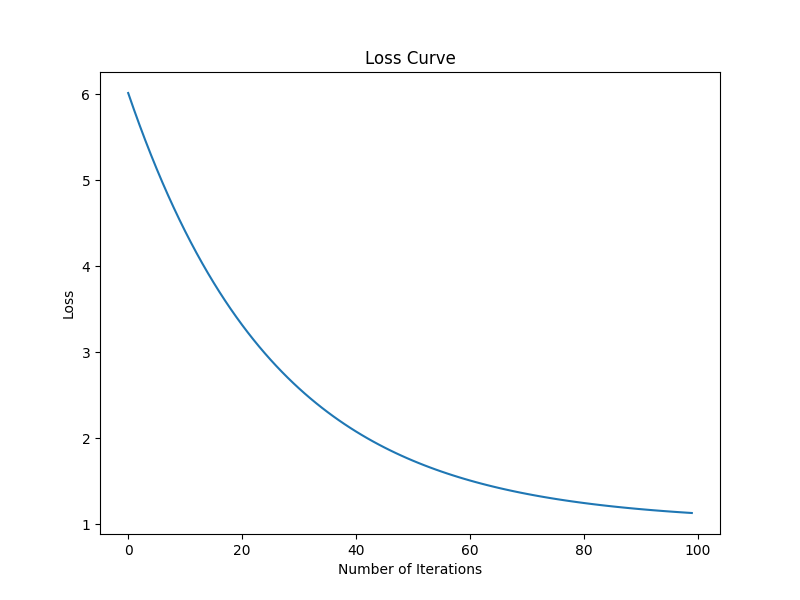

In [25]:
cost_vs_iteration(J_history, num_iters)